### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [65]:
# importing necessary libraries

import pandas as pd #pandas
import numpy as np #numpy
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns
%matplotlib inline

In [66]:
# accessing CSV file

ds = "files/The E-commerce Dataset.csv" #set file: The E-commerce Dataset as dataset
df = pd.read_csv(ds) #convert to dataframe

In [67]:
df.head()

userId  timestamp                           review                  item  \
0    4051      12807        Great job for what it is!                  eBay   
1    4052     122899      Free Access Worth your Time               NetZero   
2      33      12700    AOL..I love you!!!!!!!!!!!!    AOL (America Online)   
3      33      21000     EBAY!!!  I LOVE YOU!!!! :-)*                  eBay   
4      33      22300  Blair Witch...Oh Come On.......   Blair Witch Project   

   rating  helpfulness gender                  category  item_id  item_price  \
0     5.0          2.0      F  Online Stores & Services       88      149.00   
1     5.0          0.0      F  Online Stores & Services       46       53.00   
2     5.0          4.0      F  Online Stores & Services        0      145.84   
3     5.0          4.0      F  Online Stores & Services       88      149.00   
4     1.0          4.0      F                    Movies       12       44.00   

   user_city  
0         39  
1         39  
2         31  
3         31  
4         31

In [68]:
# counting number of Null values in each column

none = len(df[df["review"] == "none"]) #saving the length of none reviews
empty = df.isnull().sum() #sum of null data
empty["review"] = none #adding the number of none reviews
print(empty) #print total 

userId          0
timestamp       0
review         18
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [69]:
#Display length of dataframe (before and after)

og_data = len(df) #length of dataframe before removing null
print("Length before removal of empty data:", og_data) #print original data
cln_df = df.dropna() #removing null data
cln_df = cln_df[cln_df["review"] != "none"] #removing none reviews
len_aft = len(cln_df) #length of dataframe after removing null
print("Length after removal of empty data:", len_aft) #print of cleaned dataframe

Length before removal of empty data: 20000
Length after removal of empty data: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [70]:
# total number of unique users, unique reviews, unique items, and unique categories

unq_user = cln_df['userId'].nunique() #unique users
unq_review = cln_df['review'].nunique() #unique reviews
unq_item = cln_df['item'].nunique() #unique items
unq_category = cln_df['category'].nunique() #unique category

# print results

print("unique users:" , unq_user)
print("unique reviews:" , unq_review)
print("unique item:" , unq_item)
print("unique category:" , unq_category)

unique users: 8562
unique reviews: 19459
unique item: 89
unique category: 9


In [71]:
# descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

rat_stat = cln_df["rating"].describe() #descriptive statistics of ratings

# print results

print("Rating Descriptive Statistics:")
print("Total Count:", rat_stat["count"])
print("Mean:", rat_stat["mean"])
print("Standard Deviation:", rat_stat["std"])
print("Minimum:", rat_stat["min"])
print("25%:", rat_stat["25%"])
print("50%:", rat_stat["50%"])
print("75%:", rat_stat["75%"])
print("Maximum:", rat_stat["max"])

Rating Descriptive Statistics:
Total Count: 19916.0
Mean: 3.7017975497087767
Standard Deviation: 1.4044507218710878
Minimum: 1.0
25%: 3.0
50%: 4.0
75%: 5.0
Maximum: 5.0


In [72]:
# descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

#Male Data

m_data = cln_df[cln_df["gender"] == "M"] #saving male data
m_ite_count = m_data.groupby("item")["userId"].count() #counting items
m_ite_stat = m_ite_count.describe() #descriptive statisitcs

#Female Data

f_data = cln_df[cln_df["gender"] == "F"] #saving male data
f_ite_count = f_data.groupby("item")["userId"].count() #counting items
f_ite_stat = f_ite_count.describe() #descriptive statisitcs

#Print Results

print("Male Items Rated Statistics:")
print("Total Count:", m_ite_stat["count"])
print("Mean:", m_ite_stat["mean"])
print("Standard Deviation:", m_ite_stat["std"])
print("Minimum:", m_ite_stat["min"])
print("25%:", m_ite_stat["25%"])
print("50%:", m_ite_stat["50%"])
print("75%:", m_ite_stat["75%"])
print("Maximum:", m_ite_stat["max"])
print()
print("Female Items Rated Descriptive Statistics:")
print("Total Count:", f_ite_stat["count"])
print("Mean:", f_ite_stat["mean"])
print("Standard Deviation:", f_ite_stat["std"])
print("Minimum:", f_ite_stat["min"])
print("25%:", f_ite_stat["25%"])
print("50%:", f_ite_stat["50%"])
print("75%:", f_ite_stat["75%"])
print("Maximum:", f_ite_stat["max"])

Male Items Rated Statistics:
Total Count: 89.0
Mean: 113.74157303370787
Standard Deviation: 60.3308168069052
Minimum: 64.0
25%: 84.0
50%: 91.0
75%: 124.0
Maximum: 482.0

Female Items Rated Descriptive Statistics:
Total Count: 89.0
Mean: 110.03370786516854
Standard Deviation: 57.09351368950494
Minimum: 59.0
25%: 80.0
50%: 91.0
75%: 117.0
Maximum: 457.0


In [73]:
# descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

ite_stat = cln_df.groupby('item')['rating'].agg(["mean", "std", "max", "min"]) # descriptive statistics of ratings groouped by items

#print results
print(ite_stat)


                           mean       std  max  min
item                                               
AOL (America Online)   2.500532  1.368528  5.0  1.0
All Advantage          3.412481  1.541706  5.0  1.0
Alta Vista (by 1stUp)  3.541401  1.263341  5.0  1.0
Amazon.com             3.683333  1.571095  5.0  1.0
American Airlines      3.054054  1.417015  5.0  1.0
...                         ...       ...  ...  ...
Wendy's                3.971429  1.093322  5.0  1.0
What Lies Beneath      3.450000  1.201676  5.0  1.0
X-Men                  4.118367  0.853074  5.0  1.0
X.com                  4.023121  1.474409  5.0  1.0
eBay                   4.333893  0.949618  5.0  1.0

[89 rows x 4 columns]


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

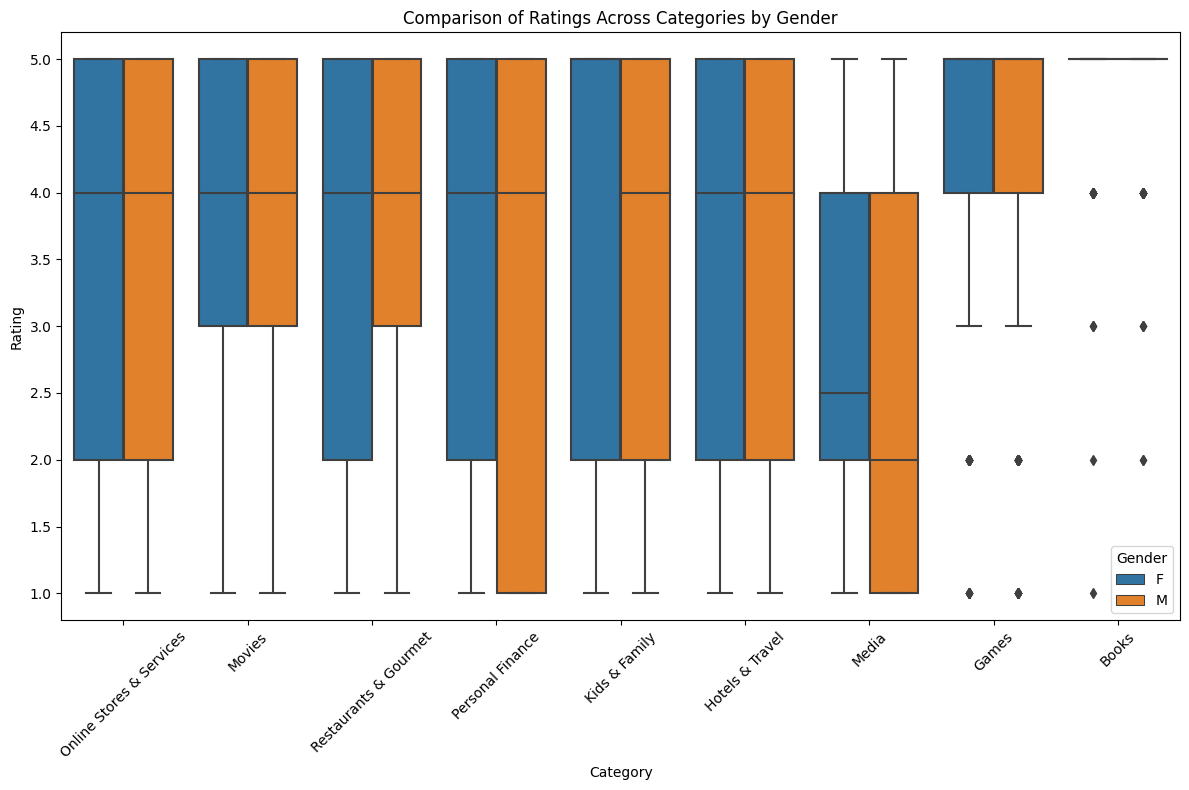

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="category", y="rating", hue="gender")
plt.title("Comparison of Ratings Across Categories by Gender")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Figure 1.1

#### Comparison Of Ratings Across Categories by Gender

##### Data
Figure 1.1 uses the data of ratings in each category to compare which gender is more favourable to producing higher ratings.

##### Analysis
In many categories, both female and males give similar ratings with the exception of "restaurant & gourmet", "personal finance" and "media". In "restaurants & gourmet", it can be seen that females tend to give lower ratings compared to males. However, in "personal finance" and "media", males tend to have lower ratings than females. Therefore, in comparison as a whole, females rate higher than males.


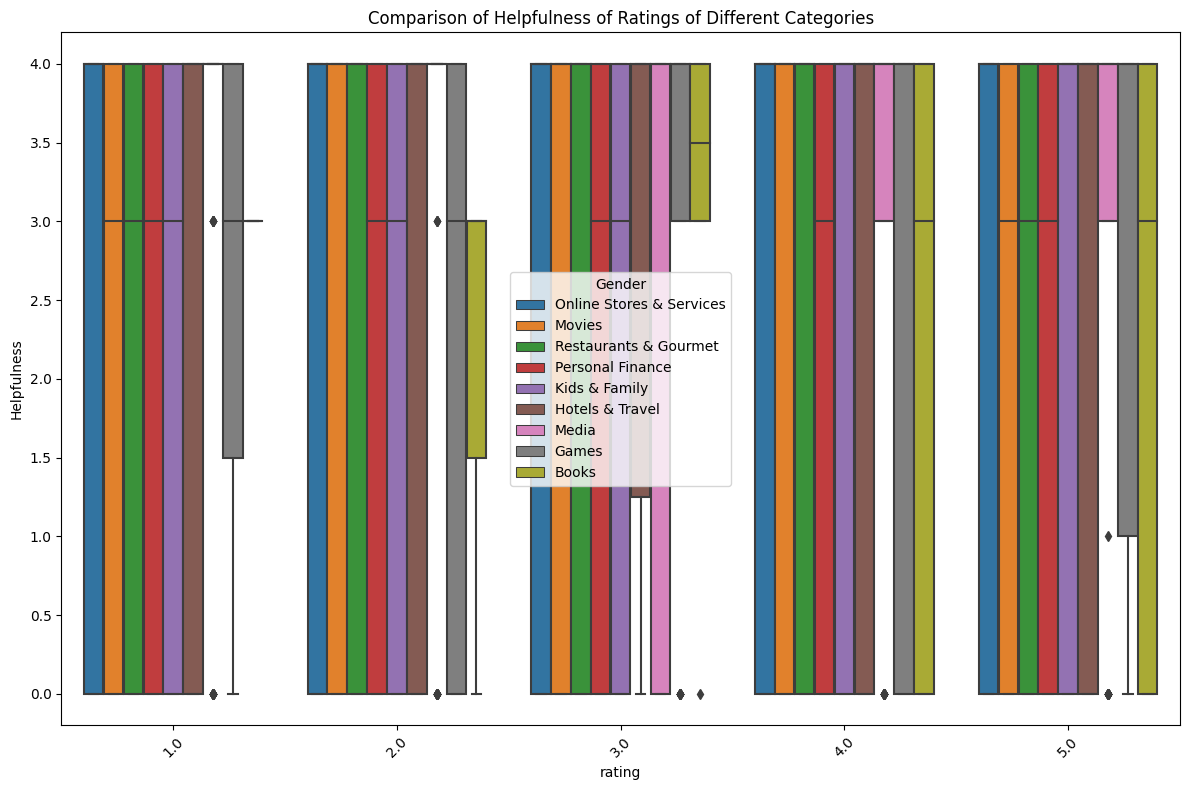

In [75]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="rating", y="helpfulness", hue="category")
plt.title("Comparison of Helpfulness of Ratings of Different Categories")
plt.xlabel("rating")
plt.ylabel("Helpfulness")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Figure 2.1

#### Comparison Of Helpfulness of Ratings Across Categories by Gender

##### Data
Figure 2.1 uses the data of the helpfulness of ratings in different categories.

##### Analysis
It can be seen that overall most ratings provide a range of usefulness. However, in the case of media, it is shown that most of the reviews gave a higher helpfulness compared to other categories

Comparison of Helpfulness of Males and Females


<Axes: title={'center': 'Females'}, xlabel='helpfulness'>

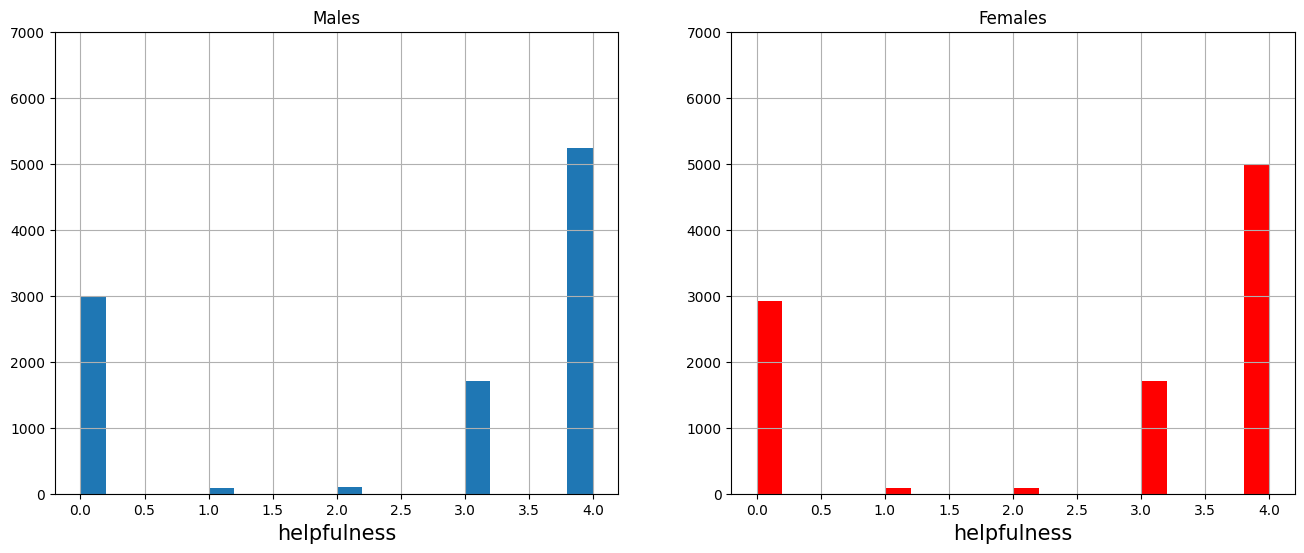

In [76]:
print("Comparison of Helpfulness of Males and Females")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.ylim(0,7000)
plt.xlabel("helpfulness", size=15)
plt.title("Males")
m_data.helpfulness.hist(bins=20)
plt.subplot(1, 2, 2)
plt.ylim(0,7000)
plt.xlabel("helpfulness", size=15)
plt.title("Females")
f_data.helpfulness.hist(bins=20, color="red")

Figure 3.1

<Axes: xlabel='Helpfulness', ylabel='Items'>

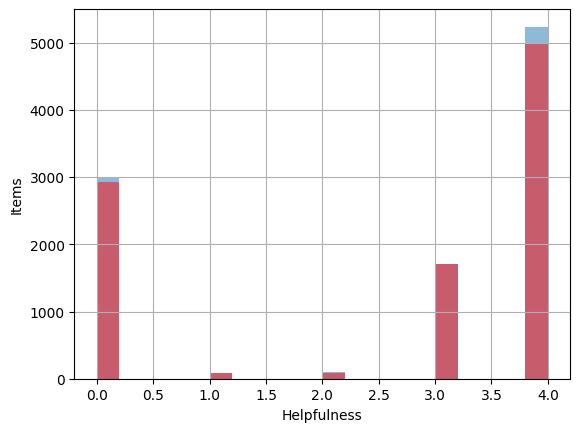

In [77]:
plt.axes(xlabel="Helpfulness", ylabel="Items")
m_data.helpfulness.hist(histtype="stepfilled", bins=20, alpha=0.5)
f_data.helpfulness.hist(histtype="stepfilled", bins=20, color="red", alpha=0.5)

Figure 3.2

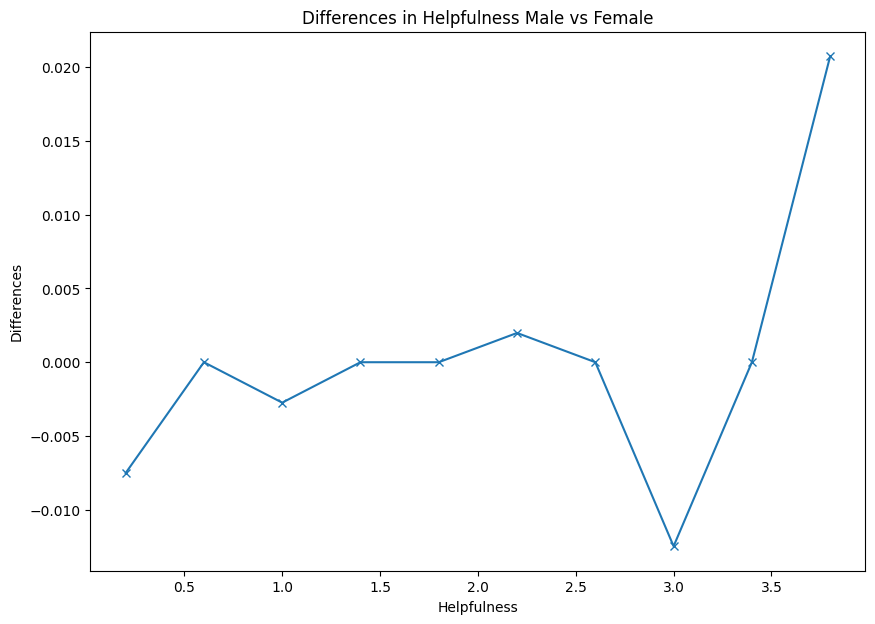

In [78]:
countm, divisionm = np.histogram(m_data.helpfulness, density = True)
countf, divisionf = np.histogram(f_data.helpfulness, density=True)


midpoints = divisionm[1:] - np.diff(divisionm)/2

plt.figure(figsize=(10,7))
plt.axes(xlabel="Helpfulness", ylabel="Differences", title="Differences in Helpfulness Male vs Female")
plt.plot(midpoints, countm - countf, "x-")

Figure 3.3

#### Comparison Of Helpfulness Across Categories by Gender

##### Data
Figure 3.1 uses the data of the helpfulness of ratings in different categories

Figure 3.2 is an overlap of both graphs in Figure 3.1

Figure 3.3 shows the difference of graphs in Figure 3.1

##### Analysis
Through the different graphs, it is evident that overall males provide more helpfull reviews compared to females.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [79]:
# Detecting and removing outliers

cln_df = cln_df[cln_df['helpfulness'] > 2] #no more than 2 reviews

user_counts = cln_df['userId'].value_counts() #less than 7 items
active_users = user_counts[user_counts >= 7].index 
cln_df = cln_df[cln_df['userId'].isin(active_users)]

item_counts = cln_df['item_id'].value_counts()#less than 11 ratings
popular_items = item_counts[item_counts >= 11].index
data = cln_df[cln_df['item_id'].isin(popular_items)]

# Print
print("Length of cleaned data:", len(cln_df))

Length of cleaned data: 2741
